<a href="https://colab.research.google.com/github/Minupama/PatternRecognition_Assignment/blob/main/CNN_ModelForFungi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#access defungi dataset on google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the OS module
import os
# Import functions to transforms an image into a NumPy array and retrieves an image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
defungi_path = '/content/drive/MyDrive/defungi'

In [3]:
# indicate the subfolders inside 'defungi'
subfolders = ['H1', 'H2', 'H3', 'H5', 'H6']

#Print each subfolder's file list
for folder in subfolders:
    folder_path = os.path.join(defungi_path, folder)
    print(f"Files in {folder}:")
    print(os.listdir(folder_path))
    print("\n")

Files in H1:
['H1_76c_24.jpg', 'H1_76d_7.jpg', 'H1_76d_6.jpg', 'H1_76c_6.jpg', 'H1_76c_3.jpg', 'H1_76c_21.jpg', 'H1_76e_9.jpg', 'H1_76e_5.jpg', 'H1_77a_18.jpg', 'H1_77a_5.jpg', 'H1_77a_12.jpg', 'H1_77a_2.jpg', 'H1_77a_13.jpg', 'H1_77a_25.jpg', 'H1_77a_23.jpg', 'H1_76e_4.jpg', 'H1_77a_14.jpg', 'H1_76e_7.jpg', 'H1_76e_2.jpg', 'H1_77a_15.jpg', 'H1_77a_19.jpg', 'H1_76e_11.jpg', 'H1_77a_22.jpg', 'H1_77a_1.jpg', 'H1_77a_8.jpg', 'H1_76e_15.jpg', 'H1_76e_13.jpg', 'H1_77a_7.jpg', 'H1_77a_4.jpg', 'H1_77a_21.jpg', 'H1_77a_20.jpg', 'H1_76e_6.jpg', 'H1_77a_17.jpg', 'H1_77a_16.jpg', 'H1_77a_10.jpg', 'H1_77a_11.jpg', 'H1_77a_6.jpg', 'H1_76e_8.jpg', 'H1_76e_3.jpg', 'H1_76e_12.jpg', 'H1_76e_14.jpg', 'H1_77a_3.jpg', 'H1_77a_24.jpg', 'H1_77b_11.jpg', 'H1_77b_7.jpg', 'H1_77b_15.jpg', 'H1_77b_14.jpg', 'H1_77a_9.jpg', 'H1_77b_1.jpg', 'H1_78a_4.jpg', 'H1_77b_5.jpg', 'H1_78a_6.jpg', 'H1_77b_2.jpg', 'H1_78b_15.jpg', 'H1_78a_7.jpg', 'H1_78b_12.jpg', 'H1_77b_10.jpg', 'H1_77b_13.jpg', 'H1_78b_11.jpg', 'H1_78a_3.j

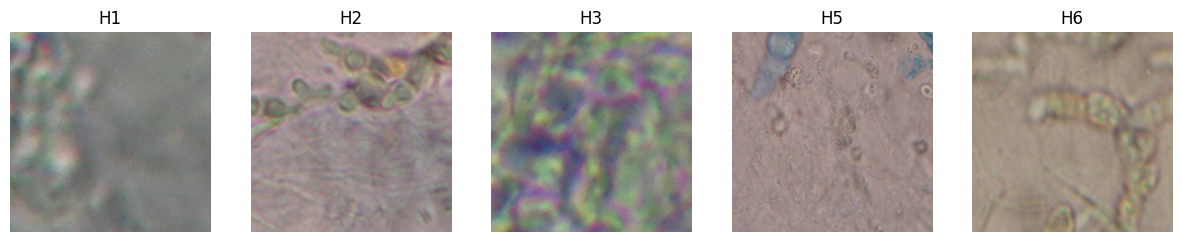

In [12]:
#import libraries
import matplotlib.pyplot as  plt
import matplotlib.image as mpimg
import random

# Adjust the size of the figures for the whole plot.
plt.figure(figsize=(15, 10))

# Iterate through every subfolder and show a single image.
for i, folder in enumerate(subfolders):
    folder_path = os.path.join(defungi_path, folder)

    # selects a file at random from current subfolder and creates the complete path to the chosen image
    image_file = random.choice(os.listdir(folder_path))
    image_path = os.path.join(folder_path, image_file)
    img = mpimg.imread(image_path)

    #plot the image that was selected at random
    plt.subplot(1, len(subfolders), i + 1)
    plt.imshow(img)
    plt.title(folder)
    plt.axis('off')

plt.show()


In [13]:
# specify the path to the dataset
dataset_path = '/content/drive/MyDrive/defungi'

subfolders = ['H1', 'H2', 'H3', 'H5', 'H6']

In [14]:
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import random

# Initialize lists to store image data and their labels
data = []
labels = []
# Path to the dataset folder
dataset_path = '/content/drive/MyDrive/defungi'



In [15]:
# Load images and labels
for label, folder in enumerate(subfolders):  # assigning an index to each folder
    folder_path = os.path.join(dataset_path, folder)
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        try:
            img = load_img(file_path, target_size=(128, 128)) # Load image and resized and converted in to array
            img_array = img_to_array(img)
            data.append(img_array)  # Append the data of the image
            labels.append(label)    # Append the label
        except Exception as e:
            print(f"Could not load image {file_path}: {e}")


In [16]:
# To convert into numpy array
data = np.array(data)
labels = np.array(labels)

# assemble labels and data into a list
dataset = list(zip(data, labels))

# Shuffle the dataset
random.shuffle(dataset)

# Separate the shuffled dataset into data and labels again
data, labels = zip(*dataset)  #

# Convert into NumPy arrays
data = np.array(data)
labels = np.array(labels)

#print the total number of images and lables
print(f"Total images: {len(data)}, Total labels: {len(labels)}")

Total images: 8950, Total labels: 8950


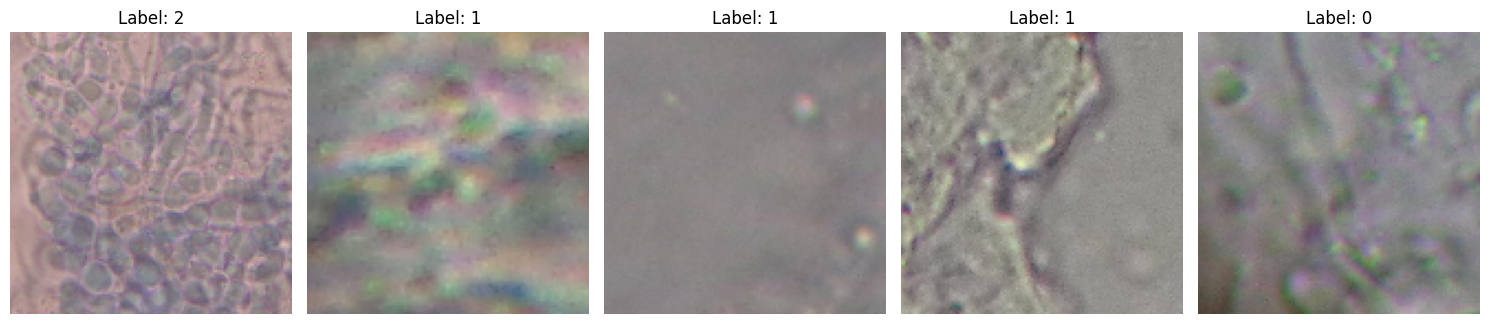

In [17]:
import matplotlib.pyplot as plt
import random

# choose 5 indices randomly
random_indices = random.sample(range(len(data)), 5)

# Plot the chosen pictures and show the labels for them
plt.figure(figsize=(15, 10))

for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(data[idx].astype("uint8"))
    plt.title(f"Label: {labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into training data (60%) and temporary data (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.4, random_state=42)

# Split the temporary set into validation data (50%) and testing data (50%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the images
# Normalize training images
X_train = X_train / 255.0
# Normalize validation images
X_val = X_val / 255.0
# Normalize testing images
X_test = X_test / 255.0

# Print the sizes of the splits
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 5370
Validation set size: 1790
Testing set size: 1790


In [19]:
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam

data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augmented data generator for the training dataset
augmented_data_generator = data_augmentation.flow(
    X_train / 255.0,  # Normalize training images
    y_train,
    batch_size=32
)

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
def build_cnn(input_shape, num_classes):
    model = models.Sequential()

    # First convolutional layer for the model
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization()) #Batch Normalization
    model.add(layers.MaxPooling2D((2, 2)))  # Max Pooling

    # Second convolutional layer for the model
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Additional convolutional layer for more depth
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten
    model.add(layers.Flatten())

    # Fully connected layer (dense layer)
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

    # Dropout to reduce overfitting
    model.add(layers.Dropout(0.3))

    # Softmax activation for multi-class classification
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

#Example inpu
input_shape = (128, 128, 3)  # Example input shape indicating height, width, and channels
num_classes = 5  # Number of classes in the output layer

# Build the model
model = build_cnn(input_shape, num_classes)

# model with the modified learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()





/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 9216)                │          36,864 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,616,069 (6.16 MB)

 Trainable params: 1,596,421 (6.09 MB)

 Non-trainable params: 19,648 (76.75 KB)

In [21]:
# Example training
history = model.fit(
    X_train,
    y_train,
    epochs=20,  # Number of epochs
    batch_size=32,  # Adjust batch size if needed
    validation_data=(X_val, y_val)  # Validation data for evaluation
)


Epoch 1/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 30s 101ms/step - accuracy: 0.5225 - loss: 4.3653 - val_accuracy: 0.5196 - val_loss: 3.3088
Epoch 2/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5774 - loss: 2.0988 - val_accuracy: 0.5229 - val_loss: 2.1836
Epoch 3/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.6220 - loss: 1.6265 - val_accuracy: 0.3715 - val_loss: 1.6864
Epoch 4/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6248 - loss: 1.4080 - val_accuracy: 0.6168 - val_loss: 1.3795
Epoch 5/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6431 - loss: 1.2704 - val_accuracy: 0.4173 - val_loss: 1.7142
Epoch 6/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.6428 - loss: 1.2106 - val_accuracy: 0.3101 - val_loss: 1.6235
Epoch 7/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6542 - loss: 1.1371 - val_accuracy: 0.3374 - val_loss: 1.8598
Epoch 8/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6578 - loss: 1.0980 - val_ac

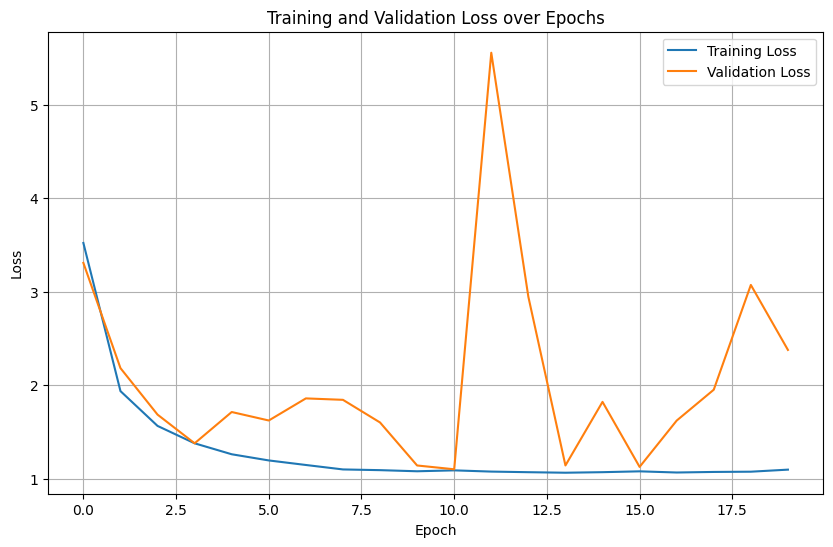

In [22]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2102 - loss: 2.2914
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Test Accuracy: 0.2095
Confusion Matrix:
[[ 43  45 582 195   0]
 [ 23  24 194 216   6]
 [  1   0  77  28  17]
 [  3   6  14 147   9]
 [  7  12  13  44  84]]

Precision for each class: [0.55844156 0.27586207 0.0875     0.23333333 0.72413793]
Recall for each class: [0.04971098 0.05183585 0.62601626 0.82122905 0.525     ]


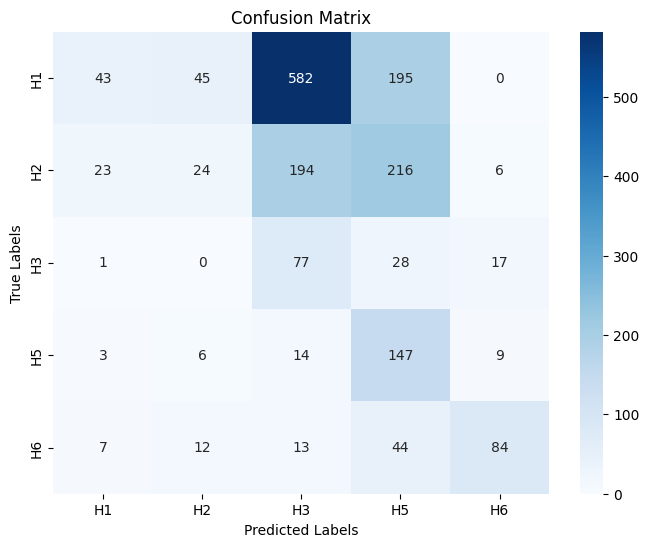

168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2060 - loss: 2.2559
Train Accuracy: 0.2041


In [23]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the test data: X_test, y_test
# Example: X_test = np.random.randn(200, 128, 128, 3)  # Replace with actual test data
# y_test = np.random.randint(0, num_classes, 200)  # Replace with actual test labels

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision and recall for each class
precision = precision_score(y_test, y_pred, average=None)  # Per class
recall = recall_score(y_test, y_pred, average=None)  # Per class

# Print evaluation metrics
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision for each class:", precision)
print("Recall for each class:", recall)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=subfolders, yticklabels=subfolders)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# If you want to see the overall accuracy (train/test)
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_accuracy:.4f}")
